In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd


file = open('timeseries_aal.csv', 'rb')
data = np.loadtxt(file, delimiter = ",")
rows, cols = np.shape(data)
x = np.arange(0, cols)


Text(0, 0.5, 'MRI signal')

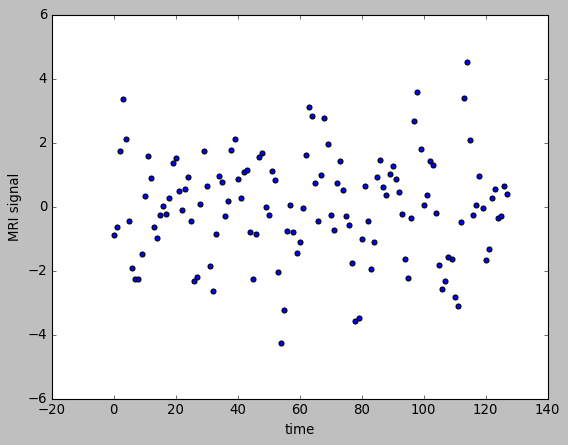

In [2]:
fig, ax = plt.subplots()
plt.scatter(x, data[0])
plt.xlabel('time')
plt.ylabel('MRI signal')

In [3]:
x_new = x[:, np.newaxis]
y_new = data[0, :,np.newaxis]
first_row = np.hstack([x_new, y_new])


Text(0, 0.5, 'MRI signal')

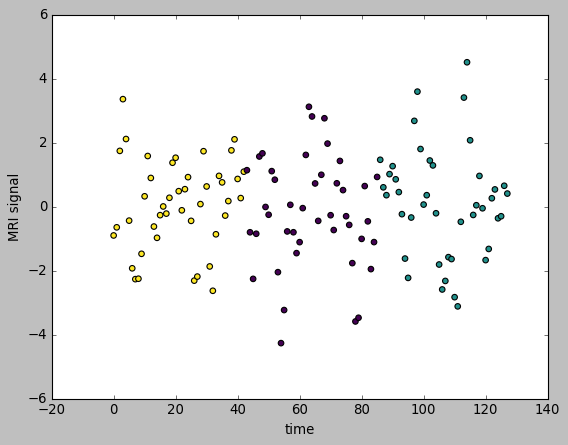

In [20]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3).fit(first_row)
all_labels = gmm.predict(first_row)
plt.scatter(first_row[:, 0], first_row[:, 1], c = all_labels, s = 25, cmap = 'viridis')
plt.xlabel('time')
plt.ylabel('MRI signal')

In [11]:
probs = gmm.predict_proba(first_row)
probs

array([[2.01116317e-14, 9.99747268e-01, 2.52732386e-04],
       [3.39524095e-14, 9.99707484e-01, 2.92516035e-04],
       [1.24138055e-13, 9.99541667e-01, 4.58332723e-04],
       [6.39424398e-13, 9.98845872e-01, 1.15412838e-03],
       [4.08815624e-13, 9.99269122e-01, 7.30878486e-04],
       [2.55630069e-13, 9.99418117e-01, 5.81882551e-04],
       [4.31620778e-13, 9.99052014e-01, 9.47985839e-04],
       [7.63405235e-13, 9.98706655e-01, 1.29334547e-03],
       [1.25936383e-12, 9.98451812e-01, 1.54818824e-03],
       [1.83275769e-12, 9.98569706e-01, 1.43029368e-03],
       [3.46842517e-12, 9.98601992e-01, 1.39800834e-03],
       [8.95570008e-12, 9.97974400e-01, 2.02559961e-03],
       [1.09004874e-11, 9.97899776e-01, 2.10022393e-03],
       [1.30758439e-11, 9.97496392e-01, 2.50360779e-03],
       [2.12510565e-11, 9.96808890e-01, 3.19111039e-03],
       [3.58565618e-11, 9.96525898e-01, 3.47410215e-03],
       [6.05315918e-11, 9.95893718e-01, 4.10628197e-03],
       [9.54782737e-11, 9.95009

Text(0, 0.5, 'MRI signal')

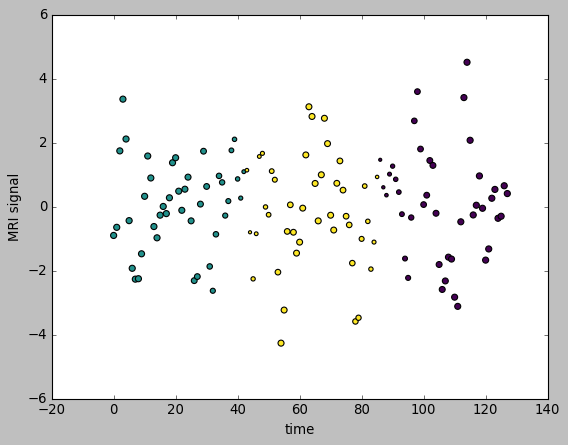

In [19]:
size = 30 * probs.max(1) ** 2
plt.scatter(first_row[:, 0], first_row[:, 1], c = all_labels, cmap='viridis', s = size)
plt.xlabel('time')
plt.ylabel('MRI signal')